<a href="https://colab.research.google.com/github/manyasha-n-m/Tutorials/blob/main/Practical_Session_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression (two dimensions):  Toy problem for warm-up**
Our observed ground truth is:
$$
y_t = 2x^1_t-3x^2_t+1, \quad t\in\{1,\dots,30\}
$$


#### Main task:

Assume that we only have information only about the 'observations' $(x_t,y_t)_{t\in\{1,\dots,30\}}$. However, we have a 'hypothesis' is that our model $\hat{~y~}_t$ depends on $x_t=(x^1_t,x^2_t)$ linearly, i.e.

$$
\hat{~y~}_t = w^1 x^1_t-w^2 x^2_t+b, \quad t\in\{1,\dots,30\}
$$

Given the 'observations'  we need to recover the weights $w^1=2, w^2=-3$ and the bias $b = 1$.

### Strategy:

In order to do so, we will solve the following optimization problem:
$$
\underset{w^1,w^2,b}{\operatorname{argmin}} \sum_{t=1}^{30} \left(\hat{~y~}_t-y_t\right)^2 = \underset{w^1,w^2,b}{\operatorname{argmin}} loss(w, b)
$$


In this notebook/lecture we will focus on **optimization** of this so-called "Loss function" defined in the formula above.

In [1]:
# importing necessary libraries for this session

import numpy as np
from numpy.random import random
import jax
import jax.numpy as jnp
import torch
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
%matplotlib inline

#### Generating random input data

In [2]:
# generate random input x
x = random((30,2))

# generate labels y corresponding to input data x according to our law
y = np.dot(x, [2., -3.]) + 1.
w_source = np.array([2., -3.])
b_source  = np.array([1.])

#### Plotting tools

In [3]:
def plot_figs(fig_num, elev, azim, x, y, weights, bias):
    fig = plt.figure(fig_num, figsize=(4, 3))
    ax = plt.axes(projection='3d')
    ax.view_init(elev=elev, azim=azim)
    ax.scatter(x[:, 0], x[:, 1], y)
    ax.plot_surface(np.array([[0, 0], [1, 1]]),
                    np.array([[0, 1], [0, 1]]),
                    (np.dot(np.array([[0, 0, 1, 1],
                                      [0, 1, 0, 1]]).T, weights) + bias).reshape((2, 2)),
                    alpha=.5)
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.set_zlabel('y')
    return fig.show()

def plot_views(x, y, w, b):
    #Generate the different figures from different views
    elev = 43.5
    azim = -110
    return plot_figs(1, elev, azim, x, y, w, b[0])


### How our toy-data looks like

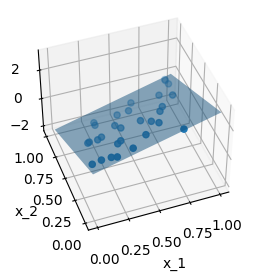

In [4]:
plot_views(x, y, w_source, b_source)

## **A few words about Gradient Descent**

Typically, for solving optimization problems one may need to use the ideas of Gradient Descent. In modern libraries, there already exist fancy methods for computing gradients recursively, however, today we will see how the basic idea can be implemented by hand.

#### Let's consider a simple example-illustration of a function in 1D to see how Gradient Descent works.

Suppose we need to minimize a function
$$f(t) = t^2 - 2t - 3$$

#### **Algorithm (with _rate_ $\alpha>0$ ):**

`1.` Choose initial point point $t_0$

`2.` Iteratively perform the "descent step", meaning:
$$t_{new} = t_{old} - \alpha f'(t_{old})$$

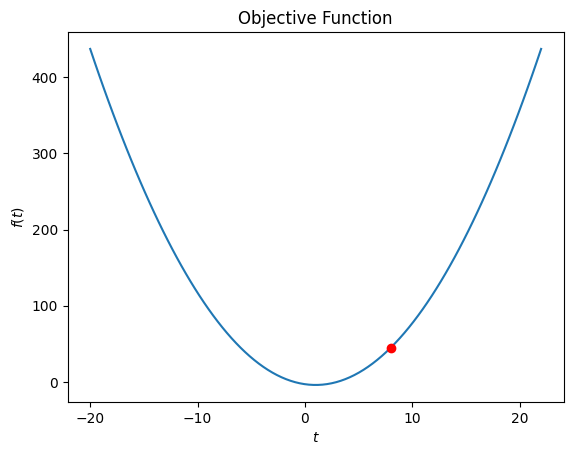

In [5]:
# plotting tools
def plotFunc(t0, t_int, function): #initial point (our first example t0 = -8) and a function
    plt.plot(t_int, function(t_int)) # plot the graph of the function
    plt.plot(t0, function(t0), 'ro') #plot a red dot on the initial condition
    plt.xlabel('$t$') # make the x-axis (and label it t)
    plt.ylabel('$f(t)$') #make the y-axis (and label it f(t))
    plt.title('Objective Function') #title of the picture/graph that we create

def plotPath(xs, ys, x0, x_int, function):
    plotFunc(x0, x_int, function)
    plt.plot(xs, ys, linestyle='--', marker='o', color='orange')
    plt.plot(xs[-1], ys[-1], 'ro')

# define the objective function
f = lambda t: t**2 - 2*t - 3
f_prime = lambda t: 2*t - 2

# define the initial point and the interval
t_0 = 8
t_int = np.linspace(-20, 22, 100)

# Initial stage
plotFunc(t_0, t_int, f)

### Let's see how simple Gradient Descent performs in 1D

Solution found:
  f_min = -4.0000
  t_min = 1.0000


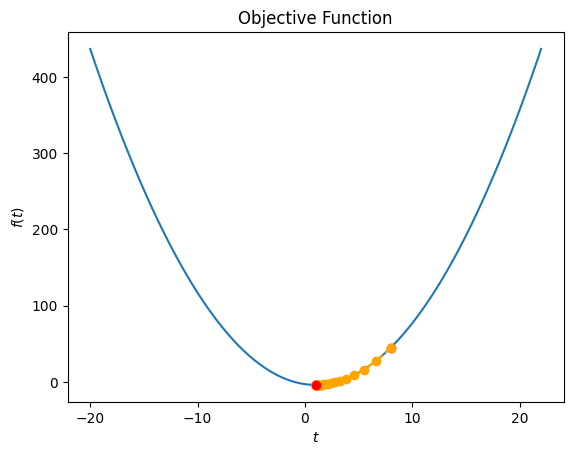

In [6]:
# 1D trivial implementation
def GradientDescentSimple(func, fprime, t0, alpha, tol=1e-5, max_iter=1000):
    # initialize x, f(x), and -f'(x)
    tk = t0
    fk = func(tk)
    pk = fprime(tk) #fprime(t0)
    # initialize number of steps, save t and f(t)
    num_iter = 0
    curve_t = [tk]
    curve_f = [fk]
    # take steps
    while abs(pk) > tol and num_iter < max_iter:
        # calculate new x, f(x), and -f'(x)
        tk = tk - alpha * pk  # x1 = x0 - alpha*derivative_of_function(tk)
        fk = func(tk) #fk = f(xk)
        pk = fprime(tk) #derivative of f at tk
        # increase number of steps by 1, save new t and f(t)
        num_iter += 1
        curve_t.append(tk) #save the curve t0 to tk
        curve_f.append(fk) #save the values f(t0) to f(tk)
    # print results / stopping criteria
    if num_iter == max_iter:
        print('Gradient descent does not converge.')
    else:
        print('Solution found:\n  f_min = {:.4f}\n  t_min = {:.4f}'.format(fk, tk))

    return curve_t, curve_f

ts, fs = GradientDescentSimple(f, f_prime, t_0, alpha=0.1)
plotPath(ts, fs, t_0, t_int, f)

### What if we choose a smaller $\alpha$?

Gradient descent does not converge.


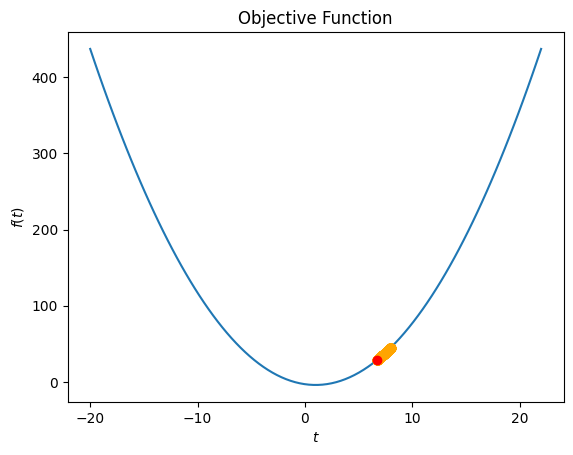

In [7]:
ts, fs = GradientDescentSimple(f, f_prime, t_0, alpha=0.0001)
plotPath(ts, fs, t_0, t_int, f)

### Bigger $\alpha$?

Solution found:
  f_min = -4.0000
  t_min = 1.0000


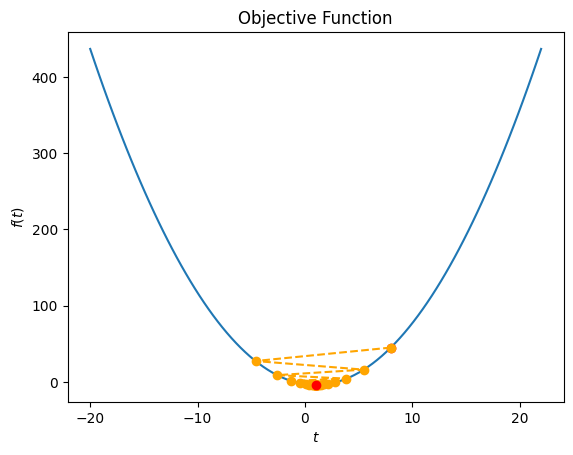

In [8]:
ts, fs = GradientDescentSimple(f, f_prime, t_0, alpha=0.9)
plotPath(ts, fs, t_0, t_int, f)

### Can $\alpha$ be too big?

Gradient descent does not converge.


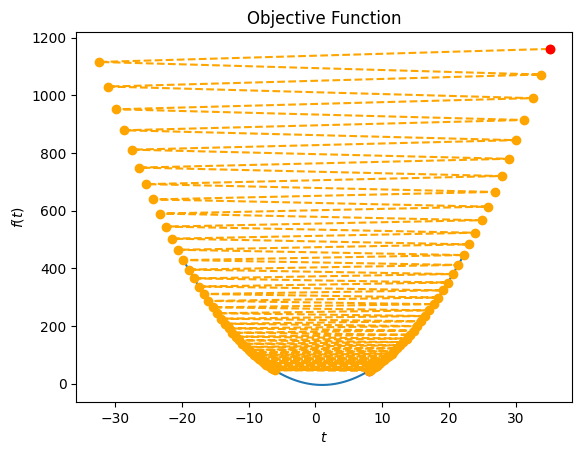

In [9]:
ts, fs = GradientDescentSimple(f, f_prime, t_0, alpha=1.01, max_iter=80)
plotPath(ts, fs, t_0, t_int, f)

## **Back to OUR model**

### How does the Gradient Descent step **looks** like?

In vector form, we define:
$$
\hat{~y~}_t = {\bf w}^T{\bf x}_t+b
$$
and we want to minimize the loss given by:
$$
loss = \sum_t\underbrace{\left(\hat{~y~}_t-y_t \right)^2}_{loss_t}.
$$

To minimize the loss we first compute the gradient of each $loss_t$:
\begin{align*}
\frac{\partial{loss_t}}{\partial w^1} &=& 2x^1_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial w^2} &=& 2x^2_t\left({\bf w}^T{\bf x}_t+b-y_t \right)\\
\frac{\partial{loss_t}}{\partial b} &=& 2\left({\bf w}^T{\bf x}_t+b-y_t \right)
\end{align*}

Note that the actual gradient of the loss is given by:
$$
\frac{\partial{loss}}{\partial w^1} =\sum_t \frac{\partial{loss_t}}{\partial w^1},\quad
\frac{\partial{loss}}{\partial w^2} =\sum_t \frac{\partial{loss_t}}{\partial w^2},\quad
\frac{\partial{loss}}{\partial b} =\sum_t \frac{\partial{loss_t}}{\partial b}
$$

For one epoch, **(Batch) Gradient Descent** updates the weights and bias as follows:
\begin{align*}
w^1_{new}&=&w^1_{old}-\alpha\frac{\partial{loss}}{\partial w^1} \\
w^2_{new}&=&w^2_{old}-\alpha\frac{\partial{loss}}{\partial w^2} \\
b_{new}&=&b_{old}-\alpha\frac{\partial{loss}}{\partial b},
\end{align*}

and then we run several epochs.

In [10]:
# randomly initialize learnable weights and bias
w_init = np.zeros(2)
b_init = np.array([0.])

w = w_init
b = b_init
print("initial values of the parameters:", w, b )

initial values of the parameters: [0. 0.] [0.]


In [11]:
# our model forward pass
def forward(x):
    return x.dot(w)+b

# Loss function
def loss_t(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2

# compute gradient
def gradient(x, y):  # d_loss/d_w, d_loss/d_b
    return 2*(x.dot(w)+b - y)*x, 2 * (x.dot(w)+b - y)



loss_progress = []
print("initial loss:", np.sum([loss_t(x_val,y_val) for x_val, y_val in zip(x, y)]))


initial loss: 22.032005373152288


In [12]:
learning_rate = 0.01 # set the value of \alpha

# Training loop
for epoch in range(100):
  grad_w = np.array([0,0])
  grad_b = np.array(0)
  l = 0
  for x_val, y_val in zip(x, y):
    grad = gradient(x_val, y_val)
    grad_w = np.add(grad_w, grad[0])
    grad_b = np.add(grad_b, grad[1])
    l += loss_t(x_val, y_val)
  w = w - learning_rate * grad_w
  b = b - learning_rate * grad_b
  loss_progress.append(l[0])
  if epoch%10 == 0:
    print("progress:", "epoch:", epoch, "loss", l[0])

# After training
print("estimation of the parameters:", "w =",w, ", b =", b)

progress: epoch: 0 loss 22.032005373152284
progress: epoch: 10 loss 9.939754929437893
progress: epoch: 20 loss 6.160930602376539
progress: epoch: 30 loss 3.8691844671636355
progress: epoch: 40 loss 2.451924661170701
progress: epoch: 50 loss 1.5632644986488535
progress: epoch: 60 loss 1.0007205563877488
progress: epoch: 70 loss 0.6423195255632452
progress: epoch: 80 loss 0.4129991875130314
progress: epoch: 90 loss 0.2658544681102823
estimation of the parameters: w = [ 1.72857133 -2.710345  ] , b = [0.98514315]


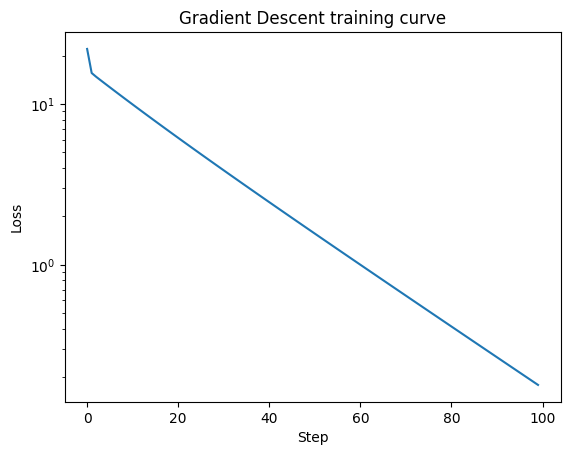

In [13]:
plt.plot(loss_progress)

plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.title("Gradient Descent training curve")
plt.show()

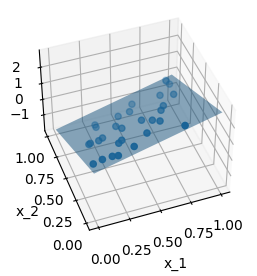

In [14]:
plot_views(x, y, w, b)

## **Linear regression using JAX**

In [15]:
# model weights
params = {
    'w': jnp.zeros(w_init.shape),
    'b': 0.
}

def jax_forward(params, X):
    return jnp.dot(X, params['w']) + params['b']


def jax_loss_fn(params, X, y):
    err = jax_forward(params, X) - y
    return jnp.sum(jnp.square(err))


grad_fn = jax.grad(jax_loss_fn)

def jax_update(params, grads):
    return jax.tree_map(lambda p, g: p - learning_rate * g, params, grads)

jax_loss_progress = []

# the main training loop
for epoch in range(100):
    loss = jax_loss_fn(params, x, y)
    jax_loss_progress.append(loss)

    grads = grad_fn(params, x, y)
    params = jax_update(params, grads)
    if epoch%10 == 0:
      print("progress:", "epoch:", epoch, "loss", loss)

<ipython-input-15-ea38969b42c0>:19: DeprecationWarning: jax.tree_map is deprecated: use jax.tree.map (jax v0.4.25 or newer) or jax.tree_util.tree_map (any JAX version).
  return jax.tree_map(lambda p, g: p - learning_rate * g, params, grads)


progress: epoch: 0 loss 22.032003
progress: epoch: 10 loss 9.9397545
progress: epoch: 20 loss 6.160931
progress: epoch: 30 loss 3.8691847
progress: epoch: 40 loss 2.4519253
progress: epoch: 50 loss 1.5632647
progress: epoch: 60 loss 1.0007206
progress: epoch: 70 loss 0.6423197
progress: epoch: 80 loss 0.41299948
progress: epoch: 90 loss 0.2658548


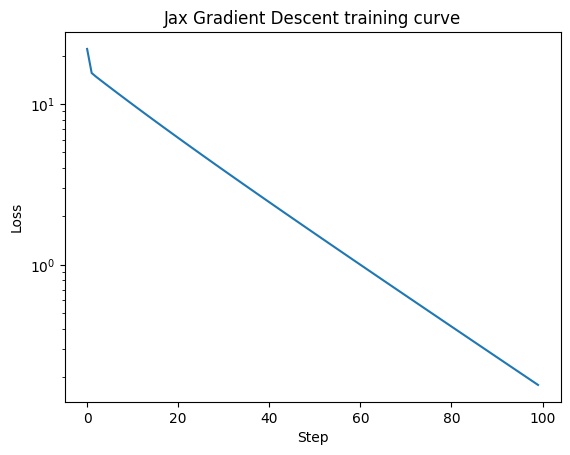

In [16]:
plt.plot(jax_loss_progress)

plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.title("Jax Gradient Descent training curve")
plt.show()

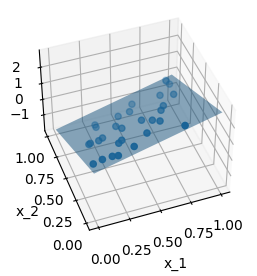

In [17]:
plot_views(x, y, params['w'], [params['b']])

## Writing the same code using Pytorch (tensors)

In [18]:
## Linear regression with tensors
dtype = torch.FloatTensor
# dtype = torch.cuda.FloatTensor # Uncomment this to run on GPU

x_t = torch.from_numpy(x).type(dtype)
y_t = torch.from_numpy(y).type(dtype).unsqueeze(1)

w_init_t = torch.from_numpy(w_init).type(dtype)
b_init_t = torch.from_numpy(b_init).type(dtype)

w_t = w_init_t.clone()
w_t.unsqueeze_(1)
b_t = b_init_t.clone()
b_t.unsqueeze_(1)
print("initial values of the parameters:", w_t, b_t )

# our model forward pass
def torch_forward(x):
    return x.mm(w_t)+b_t

# Loss function
def torch_loss(x, y):
    y_pred = torch_forward(x)
    return (y_pred - y).pow(2).sum()

# compute gradient
def torch_gradient(x, y):  # d_loss/d_w, d_loss/d_c
    return 2*torch.mm(torch.t(x),x.mm(w_t)+b_t - y), 2 * (x.mm(w_t)+b_t - y).sum()


torch_loss_progress = []

initial values of the parameters: tensor([[0.],
        [0.]]) tensor([[0.]])


In [19]:
for epoch in range(100):
    l_t = torch_loss(x_t,y_t)
    grad_w, grad_b = torch_gradient(x_t,y_t)
    w_t = w_t-learning_rate*grad_w
    b_t = b_t-learning_rate*grad_b
    torch_loss_progress.append(l_t)

    if epoch%10 == 0:
      print("progress:", "epoch:", epoch, "loss", l_t)

# After training
print("estimation of the parameters:", w_t, b_t )

progress: epoch: 0 loss tensor(22.0320)
progress: epoch: 10 loss tensor(9.9398)
progress: epoch: 20 loss tensor(6.1609)
progress: epoch: 30 loss tensor(3.8692)
progress: epoch: 40 loss tensor(2.4519)
progress: epoch: 50 loss tensor(1.5633)
progress: epoch: 60 loss tensor(1.0007)
progress: epoch: 70 loss tensor(0.6423)
progress: epoch: 80 loss tensor(0.4130)
progress: epoch: 90 loss tensor(0.2659)
estimation of the parameters: tensor([[ 1.7286],
        [-2.7103]]) tensor([[0.9851]])


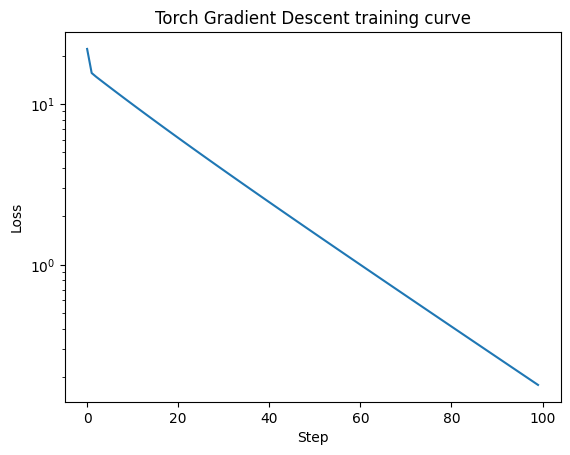

In [20]:
plt.plot(torch_loss_progress)

plt.xlabel("Step")
plt.yscale("log")
plt.ylabel("Loss")
plt.title("Torch Gradient Descent training curve")
plt.show()

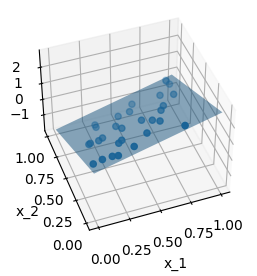

In [21]:
plot_views(x, y, w_t.numpy(), b_t.numpy())

# **Assignment: (one-dimensional) Linear and Polynomial Regression**

Here is a list of things we can prectice today. The goal of this practical session is for you all to try out different tools for solving linear regression.

## *Important:* Do not hesitate to ask all the questions that you have, I am very happy to assist.

### **Linear Regression**

`1.` Generate some data $x = (x_t)_t$, each $x_t\in\mathbb{R}$ (~ 50 points).

`2.` Choose come coefficients $w$ and $b$ to construct a ground truth $y_t = wx_t +b$.

`3.` Apply the previous methodology to estimate $w,b\in\mathbb{R}$ approximating these 50 data points via Gradient Descent implementations (using the examples above).

In [ ]:
"""Write your code here"""

### **Regression for polynomial of degree 2**

`1.` Now assume that our ground truth model will have a form
$$
f_{t}(x) = w_2 x^2_t+ w_1x_t +w_0, \quad t\in\{1,\dots,50\}
$$
for some fixed $w_0, w_1, w_2\in\mathbb{R}$.

`2.` Use the Gradient Descent methods to approximate your model by

$$
\hat{~f~}_{t}(x) = \hat{~w~}_2 x^2_t+ \hat{~w~}_1x_t +\hat{~w~}_0, \quad t\in\{1,\dots,50\}
$$

### _Can we use the same loss function?_

In [ ]:
"""Write your code here"""

### **Regression for polynomial of degree 3**

`1.` Now repeat the same analysis having a new ground truth model
$$
g_{t}(x) = w_3 x^3 + w_2 x^2_t+ w_1x_t +w_0, \quad t\in\{1,\dots,50\}
$$
for some fixed $w_0, w_1, w_2, w_3\in\mathbb{R}$.


In [ ]:
"""Write your code here"""

**Hint-idea for the polynomial regression tasks:** Given the 'observations' $(x_t,f_{t}(x_t))_{t\in\{1,\dots,50\}}$ (in the second case) and $(x_t,g_{t}(x_t))_{t\in\{1,\dots,50\}}$ (in the third case) recover the weights and the bias like we would do for the Linear Regression.


## **P.S.**
Above you see the exercises. However, for scientific curiosity, you may play with those a bit more. Here are some extra ideas:

- Try to write your own version of `plot_views` function to plot the samples $(y_t, x_t)$, (and later $(f_t, x_t)$, $(g_t, x_t)$) to compare how well your trained model imitates it.
- Play with the learning rate of your model, see "how fast" (how many iterations is needed) we converge to the solution.

____
By Nataliia Monina